In [ ]:
import numpy as np
import h5py
import glob
import sys
import os
import time

from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistic
import scipy.stats
import scipy.optimize
# import tikzplotlib

In [ ]:
df = pd.read_pickle(
    "output/data.pkl")

In [ ]:
df_analyse = pd.DataFrame()
for i in tqdm(range(df.shape[0])):
    dirc = statistic._remap_direction_sym(
        np.array(df['direction_ref'].iloc[i]) -
        np.array(df['direction'].iloc[i]))
    df_analyse = df_analyse.append(
        {
            "voxel_size":
                df['voxel_size'].iloc[i],
            "resolution":
                df['resolution'].iloc[i],
            "model":
                df['model'].iloc[i],
            "omega":
                df['omega'].iloc[i],
            'f0':
                df['f0'].iloc[i],
            'f1':
                df['f1'].iloc[i],
            "transmittance":
                df['transmittance'].iloc[i],
            "direction":
                df['direction'].iloc[i],
            "retardation":
                df['retardation'].iloc[i],
            "diff_trans": (np.array(df['transmittance_ref'].iloc[i]) -
                           np.array(df['transmittance'].iloc[i])).tolist(),
            "diff_dir": (np.rad2deg(dirc)).tolist(),
            "diff_ret": (np.array(df['retardation_ref'].iloc[i]) -
                         np.array(df['retardation'].iloc[i])).tolist(),
        },
        ignore_index=True)

df_analyse.to_pickle("output/data_.pkl")

In [21]:
df_analyse = pd.read_pickle(
    "output/data_.pkl")

(-10, 10)

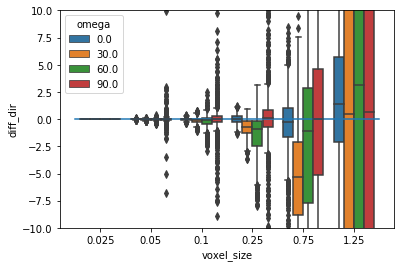

In [23]:
fig = sns.boxplot(
    x='voxel_size',
    y='diff_dir',
    hue='omega',
    data=df_analyse[(df_analyse.model == 'r') & (df_analyse.f0 == 0) & (df_analyse.f1 == 0) &
                    (df_analyse.resolution == 1.25)].explode('diff_dir'),
)
plt.plot([-0.5,5.5],[0,0])
# fig.axes.set_xlim(-1,1)
fig.axes.set_ylim(-10,10)
# tikzplotlib.save("voxel_size_vs_diff_dir.tex

In [20]:
name = 'direction'
df_analyse[(df_analyse.model == 'r') & (df_analyse.f0 == 0) & (df_analyse.f1 == 0) & (df_analyse.omega == 0) & (df_analyse.psi == 0.5) &
                    (df_analyse.resolution == 1.25)].explode(name)[[name, 'voxel_size']].sort_values(name).iloc[100:110]

AttributeError: 'DataFrame' object has no attribute 'psi'

In [ ]:
name = 'direction'
df[(df.model == 'r') & (df.f0 == 0) & (df.f1 == 0) & (df.omega == 0) &
                    (df.resolution == 1.25)].explode(name)[[name, 'voxel_size']].sort_values(name)
sns.swarmplot(
    x='voxel_size',
    y=name,
    hue='omega',
    data=df[(df.model == 'r') & (df.resolution == 1.25)].explode(name))

In [ ]:
name = 'diff_dir'
df_analyse[(df_analyse.model == 'r') & (df_analyse.f0 == 0) & (df_analyse.f1 == 0) & (df_analyse.omega == 0) &
                    (df_analyse.resolution == 1.25)].explode(name)[[name, 'voxel_size']].sort_values(name)
sns.boxplot(
    x='voxel_size',
    y=name,
    hue='omega',
    data=df_analyse[(df_analyse.model == 'r') & (df_analyse.resolution == 1.25)].explode(name))